# Business Understanding

## Project Domain

Industri perjalanan sangat bergantung pada loyalitas pelanggan untuk mempertahankan pendapatan. Mengidentifikasi pelanggan yang berpotensi berhenti (churn) sangat penting agar perusahaan dapat mengambil tindakan pencegahan, seperti menawarkan promosi atau layanan yang dipersonalisasi.

## Problem Statements

Perusahaan travel mengalami penurunan jumlah pelanggan aktif dari tahun ke tahun. Namun, belum ada sistem otomatis yang dapat mendeteksi pelanggan yang berpotensi churn berdasarkan perilaku dan profil mereka. Hal ini menyulitkan dalam merancang strategi retensi yang tepat sasaran.

## Goals

Membangun sebuah sistem prediksi berbasis Artificial Neural Network (ANN) yang dapat memprediksi kemungkinan seorang pelanggan akan berhenti menggunakan layanan perusahaan travel (churn atau tidak), berdasarkan variabel seperti:

- Usia (Age)

- Status Frequent Flyer

- Kelas pendapatan tahunan (AnnualIncomeClass)

- Jumlah layanan yang digunakan (ServicesOpted)

- Aktivitas sosial media (AccountSyncedToSocialMedia)

- Pemesanan hotel (BookedHotelOrNot)

dll.

## Solution Statements

Solusi yang ditawarkan adalah mengembangkan model klasifikasi biner menggunakan Artificial Neural Network (ANN) untuk memprediksi Target (1 = Churn, 0 = Tidak Churn). Solusi ini mencakup:

1. Pra-pemrosesan data: normalisasi dan encoding fitur.

2. Eksplorasi data: untuk memahami hubungan antar variabel dan distribusi data.

3. Pelatihan model ANN: menggunakan TensorFlow/Keras atau diubah ke TFLite untuk deployment ringan.

4. Penerapan model: melalui antarmuka pengguna berbasis Streamlit agar dapat digunakan oleh tim marketing atau manajemen untuk memantau risiko churn pelanggan.

# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rifkaraudatuljannah","key":"d0825e70a2c89032888f561c52f6d7e6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d tejashvi14/tour-travels-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/tejashvi14/tour-travels-customer-churn-prediction
License(s): CC0-1.0
  0% 0.00/3.45k [00:00<?, ?B/s]
100% 3.45k/3.45k [00:00<00:00, 20.1MB/s]


In [ ]:
!mkdir tour-travels-customer-churn-prediction
!unzip tour-travels-customer-churn-prediction.zip -d tour-travels-customer-churn-prediction
!ls tour-travels-customer-churn-prediction

Archive:  tour-travels-customer-churn-prediction.zip
  inflating: tour-travels-customer-churn-prediction/Customertravel.csv  
Customertravel.csv


## Import Library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('tour-travels-customer-churn-prediction/Customertravel.csv')

In [ ]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


## Exploratory Data Analysis

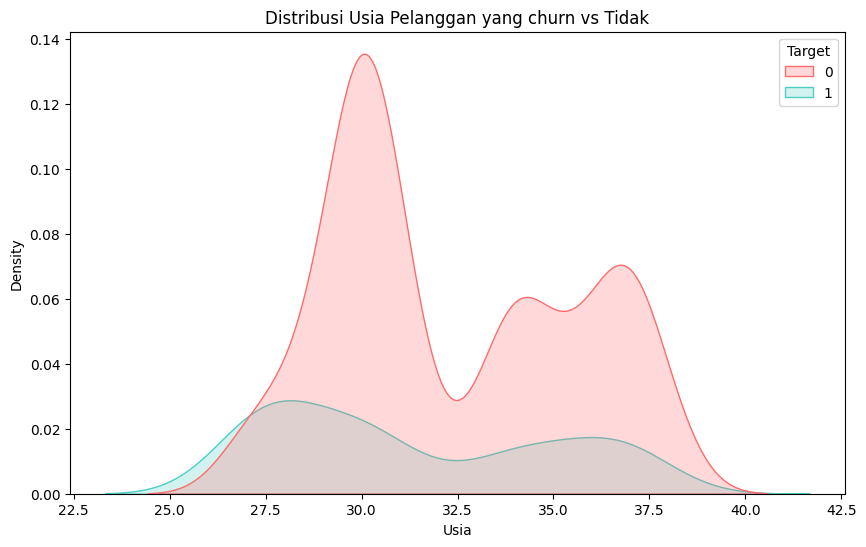

In [ ]:
# 1. Distribusi Usia Pelanggan yang churn vs Tidak
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Age', hue='Target', fill=True, palette=['#FF6B6B','#4ECDC4'])
plt.title('Distribusi Usia Pelanggan yang churn vs Tidak')
plt.xlabel('Usia')
plt.ylabel('Density')
plt.show()

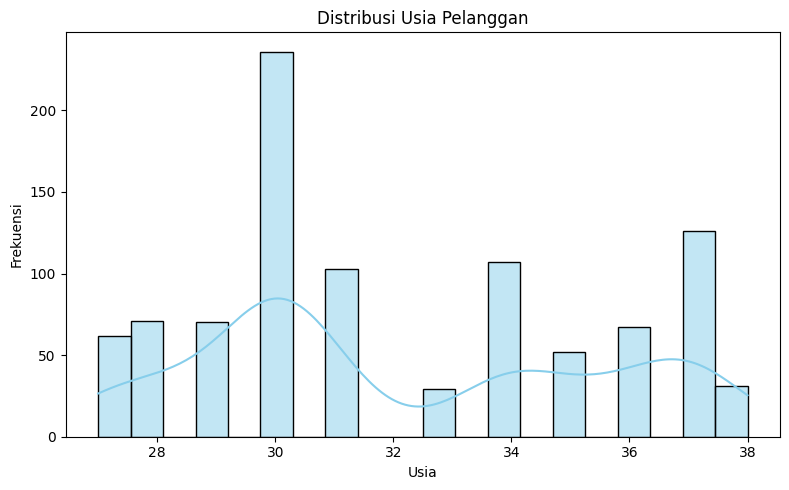

In [ ]:
# 2. Distribusi usia pelanggan
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

<ipython-input-11-1653635369>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BookedHotelOrNot', data=df, palette='Set2')


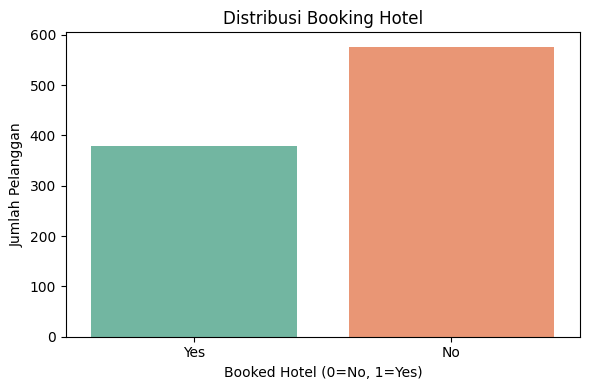

In [ ]:
# 3. Jumlah pelanggan berdasarkan status Booked Hotel Or Not
plt.figure(figsize=(6, 4))
sns.countplot(x='BookedHotelOrNot', data=df, palette='Set2')
plt.title('Distribusi Booking Hotel')
plt.xlabel('Booked Hotel (0=No, 1=Yes)')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

<ipython-input-12-973015742>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Age', data=df, palette='Set3')


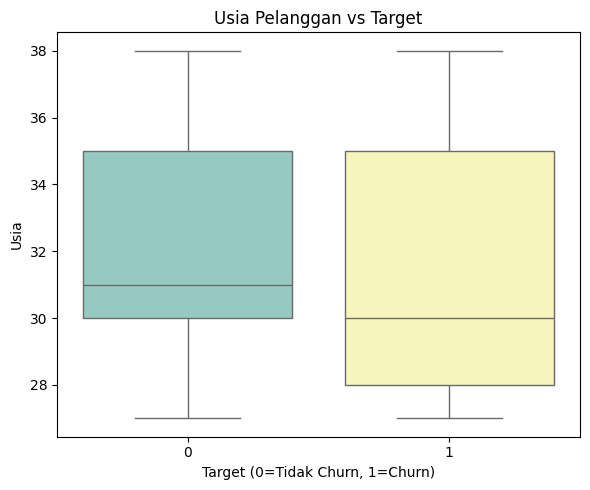

In [ ]:
# 4. Boxplot Age terhadap Target (Churn vs Non-Churn)
plt.figure(figsize=(6, 5))
sns.boxplot(x='Target', y='Age', data=df, palette='Set3')
plt.title('Usia Pelanggan vs Target')
plt.xlabel('Target (0=Tidak Churn, 1=Churn)')
plt.ylabel('Usia')
plt.tight_layout()
plt.show()

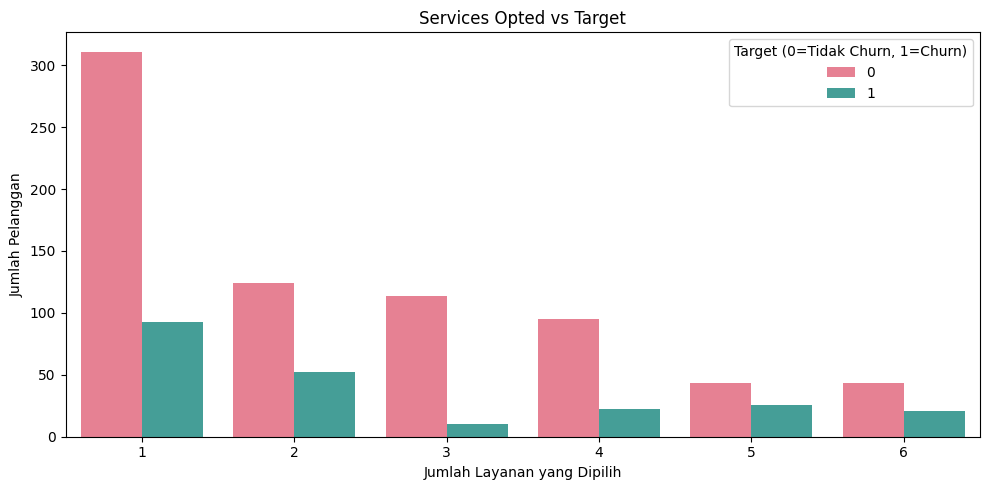

In [ ]:
# 5. Jumlah pelanggan berdasarkan ServicesOpted dan dibedakan berdasarkan Target
plt.figure(figsize=(10, 5))
sns.countplot(x='ServicesOpted', hue='Target', data=df, palette='husl')
plt.title('Services Opted vs Target')
plt.xlabel('Jumlah Layanan yang Dipilih')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Target (0=Tidak Churn, 1=Churn)')
plt.tight_layout()
plt.show()

# Data Preparation

In [ ]:
cat_cols = ['FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
            'AccountSyncedToSocialMedia', 'BookedHotelOrNot']

encoders = {}

In [ ]:
# Simpan nilai string dengan LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str).str.strip().str.title()  # Standarisasi dulu
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # simpan encoder

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("\nClass Distribution:")
print(y.value_counts(normalize=True))


Class Distribution:
Target
0    0.765199
1    0.234801
Name: proportion, dtype: float64


# Modeling

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - accuracy: 0.7343 - loss: 0.5958 - precision: 0.3022 - recall: 0.1146 - val_accuracy: 0.7190 - val_loss: 0.5294 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7897 - loss: 0.5041 - precision: 0.8288 - recall: 0.0330 - val_accuracy: 0.7190 - val_loss: 0.4796 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8097 - loss: 0.4267 - precision: 0.7036 - recall: 0.0550 - val_accuracy: 0.7190 - val_loss: 0.4483 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7798 - loss: 0.4381 - precision: 0.6382 - recall: 0.0729 - val_accuracy: 0.7712 - val_loss: 0.4278 - val_precision: 1.0000 - val_recall: 0.1860
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7768 - loss: 0.4515 - precision: 0.6208 - recall: 0.1314 - val_accura

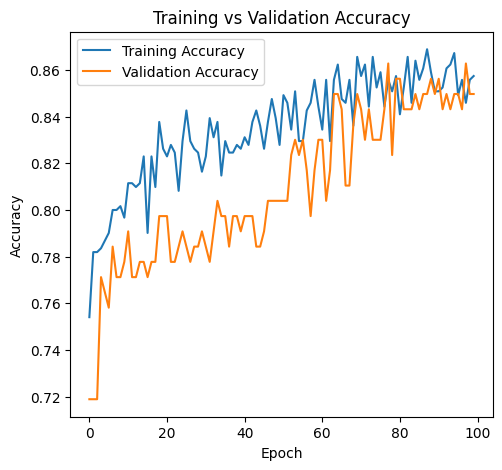

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

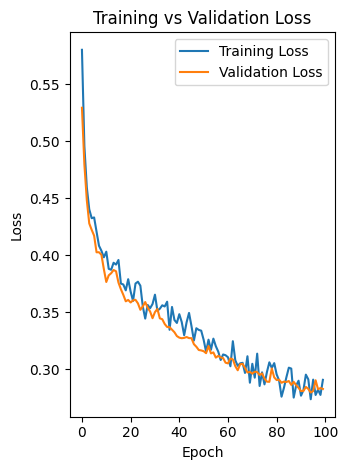

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prediksi pada test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       146
           1       0.78      0.69      0.73        45

    accuracy                           0.88       191
   macro avg       0.84      0.81      0.83       191
weighted avg       0.88      0.88      0.88       191



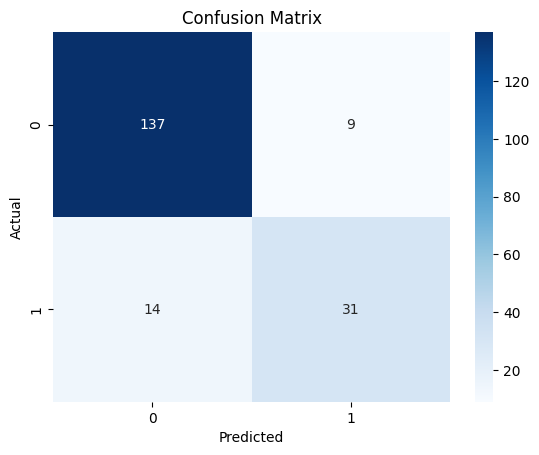

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 87.96%


# Deployment

## Model Simulation

In [ ]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,5,0,1,0
1,34,2,1,4,1,0,1
2,37,0,2,2,1,0,0
3,30,0,2,1,0,0,0
4,30,0,1,0,0,0,0


In [ ]:
# Simulasi input pelanggan baru
sample_input = np.array([[32, 1, 2, 3, 1, 0]])  # Gantilah sesuai dengan kasus nyata

In [ ]:
# Ubah ke DataFrame dan beri nama kolom
sample_input_df = pd.DataFrame(sample_input, columns=[
    'Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
    'AccountSyncedToSocialMedia', 'BookedHotelOrNot'
])

In [ ]:
# Pastikan tipe data numerik
sample_input_df = sample_input_df.astype(float)

In [ ]:
sample_input_scaled = scaler.transform(sample_input_df)

In [ ]:
# Prediksi
predicted_prob = model.predict(sample_input_scaled)[0][0]
predicted_class = int(predicted_prob > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [ ]:
# Output hasil prediksi
print(f"Probabilitas Churn: {predicted_prob:.2f}")
print(f"Prediksi: {'Churn' if predicted_class == 1 else 'Tidak Churn'}")

Probabilitas Churn: 0.03
Prediksi: Tidak Churn


## Save Model

In [ ]:
model.save('tour-travels-customer-churn-prediction.h5')

In [ ]:
model = tf.keras.models.load_model('tour-travels-customer-churn-prediction.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("tour-travels-customer-churn-prediction.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmpzn1674h4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139040883007056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139040883007824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139040883012048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139040883010896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139040883003216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139040883013776: TensorSpec(shape=(), dtype=tf.resource, name=None)


6568